<a href="https://colab.research.google.com/github/Ravisankar-S/Team2_Zelbytes/blob/main/day11_Tasks_Team2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -q straw.zip -d Dataset

In [ ]:
import shutil
import os

inner_folder = "/content/Dataset/straw"
outer_folder = "/content/Dataset"

for item in os.listdir(inner_folder):
    shutil.move(os.path.join(inner_folder, item), outer_folder)

os.rmdir(inner_folder)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (224, 224)
batch_size = 32
data_dir = '/content/Dataset'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,  # Use True only if vertical orientation doesn't matter
    brightness_range=(0.8, 1.2),
    channel_shift_range=10.0,
    fill_mode='nearest',
    validation_split=0.2

)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 1208 images belonging to 3 classes.
Found 301 images belonging to 3 classes.


In [ ]:
import os
for folder in os.listdir('/content/Dataset'):
    print(folder, "->", len(os.listdir(os.path.join('/content/Dataset', folder))), "images")

ripe -> 722 images
unripe -> 497 images
turning -> 290 images


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
outputs = Dense(3, activation='softmax', kernel_regularizer=l2(0.001))(x)  # Changed to 3 classes

model = Model(inputs=base_model.input, outputs=outputs)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator, validation_data=val_generator, epochs=32)

Epoch 1/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 61s 913ms/step - accuracy: 0.4209 - loss: 1.4448 - val_accuracy: 0.5648 - val_loss: 1.1504
Epoch 2/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 499ms/step - accuracy: 0.7279 - loss: 0.8993 - val_accuracy: 0.7309 - val_loss: 0.9017
Epoch 3/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 480ms/step - accuracy: 0.8599 - loss: 0.7202 - val_accuracy: 0.8040 - val_loss: 0.7701
Epoch 4/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 510ms/step - accuracy: 0.8966 - loss: 0.6033 - val_accuracy: 0.8306 - val_loss: 0.6434
Epoch 5/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 478ms/step - accuracy: 0.9231 - loss: 0.5253 - val_accuracy: 0.9236 - val_loss: 0.5572
Epoch 6/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 506ms/step - accuracy: 0.9371 - loss: 0.4889 - val_accuracy: 0.9236 - val_loss: 0.5352
Epoch 7/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 471ms/step - accuracy: 0.9333 - loss: 0.4503 - val_accuracy: 0.9502 - val_loss: 0.4892
Epoch 8/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 507ms/step - accuracy: 0.9490 - loss: 0.4225 - val_accu

In [ ]:
model.save('/content/mobilenetv2_strawberry_ripeness.h5')

/tmp/ipython-input-25-2176538717.py:26: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-25-2176538717.py:26: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


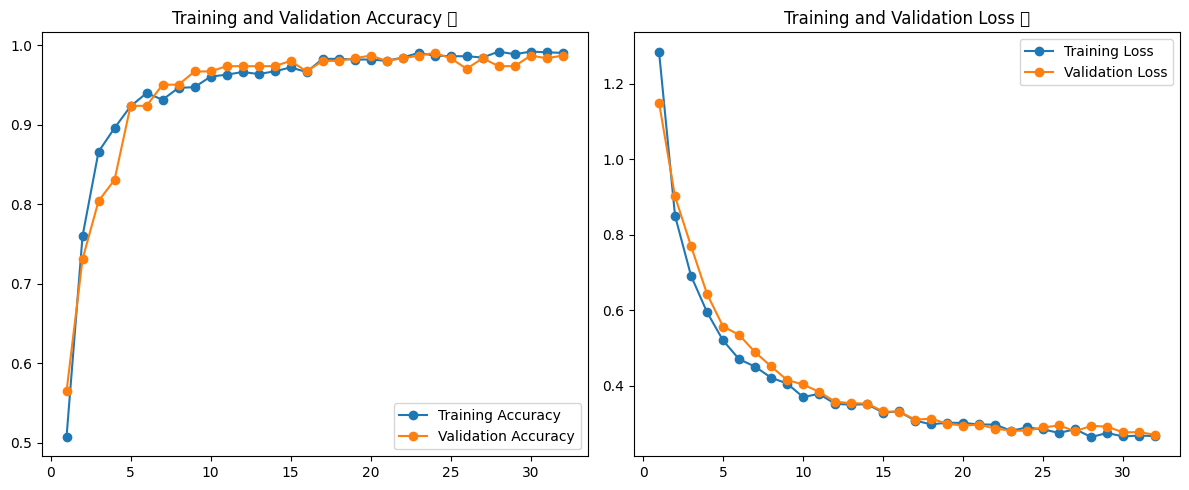

In [ ]:
import matplotlib.pyplot as plt

# Extract history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy 💡')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss 📉')

plt.tight_layout()
plt.show()
